In [13]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import cv2

import torch
import torch.nn as nn
from mirror_autoencoder import MirrorAutoencoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PATH_GPU = "/home/pgliwny/computer_vision_project/data"
PATH_ADATA = "/media/pgliwny/ADATA HD330/Computer_vision_for_MAGIC/prepare_images/data"
H5_PATH = os.path.join(PATH_GPU, "webcam_images.h5")

In [3]:
event_id = 15
f = h5py.File(H5_PATH, "r")
keys = list(f["images"].keys())
img = f["images"][keys[event_id]]["image"][:]

In [6]:
f.close()

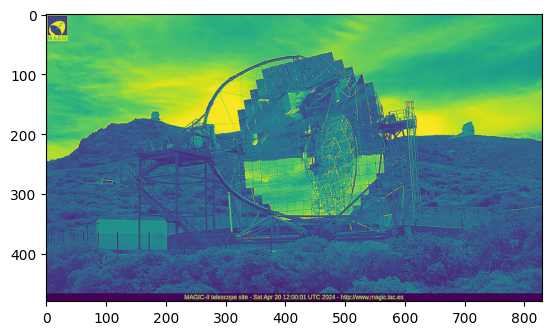

In [5]:
plt.imshow(img)

In [11]:
 f["images"][keys[event_id]]["mirrors"]["mirror_20"]

<HDF5 dataset "mirror_20": shape (17, 19), type "|u1">

In [5]:
f = h5py.File(H5_PATH, "r")
mirror_list = []
for entry_name in f["images"]:
    img_array = f["images"][entry_name]['mirrors']['mirror_172'][:]
    mirror_list.append(img_array)

X = np.stack(mirror_list)

f.close()

In [12]:
X.shape

(203, 17, 16)

In [5]:
X.reshape(203, 1, 17, 16) 

array([[[[  0,   0,   0, ..., 133, 122,   0],
         [126, 143, 144, ..., 134, 118,   0],
         [112, 137, 100, ..., 121, 106,   0],
         ...,
         [  0, 222, 255, ..., 255, 227, 250],
         [  0, 234, 254, ..., 255, 239, 251],
         [  0, 170, 254, ...,   0,   0,   0]]],


       [[[  0,   0,   0, ..., 101, 109,   0],
         [104, 119, 102, ..., 105, 109,   0],
         [100, 118, 119, ...,  98,  85,   0],
         ...,
         [  0, 140, 179, ..., 165, 118, 138],
         [  0, 137, 219, ..., 187, 175, 173],
         [  0, 105, 177, ...,   0,   0,   0]]],


       [[[  0,   0,   0, ...,  98,  96,   0],
         [102, 100,  91, ...,  93,  97,   0],
         [ 69,  97, 102, ..., 101,  87,   0],
         ...,
         [  0, 123, 154, ..., 156, 117, 135],
         [  0, 124, 178, ..., 139, 126, 139],
         [  0,  77, 146, ...,   0,   0,   0]]],


       ...,


       [[[  0,   0,   0, ..., 107, 106,   0],
         [108, 127,  89, ..., 116, 107,   0],
         [ 4

In [14]:
X.dtype

dtype('uint8')

# Prepare data

To preapre data for Autodecoder, we need resize image to (18, 16)

In [2]:
torch.cuda.is_available() 

True

# run encoder with pytorch

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MirrorAutoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [15]:
X = X.reshape(203, 1, 17, 16) 
X_tensor = torch.tensor(X, dtype=torch.float32)
X_tensor = X_tensor.to(device)


In [16]:
epochs = 20
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = loss_fn(outputs, X_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 31852.5215
Epoch 2, Loss: 31827.3945
Epoch 3, Loss: 31802.2129
Epoch 4, Loss: 31778.6465
Epoch 5, Loss: 31759.1113
Epoch 6, Loss: 31744.8633
Epoch 7, Loss: 31735.5176
Epoch 8, Loss: 31729.7500
Epoch 9, Loss: 31726.1934
Epoch 10, Loss: 31723.9492
Epoch 11, Loss: 31722.4707
Epoch 12, Loss: 31721.4512
Epoch 13, Loss: 31720.7227
Epoch 14, Loss: 31720.1777
Epoch 15, Loss: 31719.7637
Epoch 16, Loss: 31719.4375
Epoch 17, Loss: 31719.1738
Epoch 18, Loss: 31718.9590
Epoch 19, Loss: 31718.7852
Epoch 20, Loss: 31718.6406


In [17]:
with torch.no_grad():
    encoded = model.encoder(X_tensor)
    features =  encoded.view(encoded.size(0), -1).cpu().numpy()

In [20]:
features.shape

(203, 100)

In [21]:
torch.save(model.state_dict(), "data/autoencoder_mirror_172.pt")

RuntimeError: Parent directory data does not exist.